# Twitch dataset

In [1]:
from data.twitch import TwitchGraph
from model.graph_mcmc import Graph_MCMC

In [2]:
#twitch = TwitchGraph()
#graph = twitch.generate_mcmc_graph()
graph = Graph_MCMC()
graph.read_from_file("twitch.gt")

In [3]:
graph.print_info()

Graph with N=7126 nodes, E=35324 edges and D=2545 vertex features


In [4]:
graph.partition(B_min=10, B_max=20)

Performing inference...
    B: 15 <- 20    shrinking 20 -> 15
    B: 15 <- 20    B=15  niter:     1  count:    0  breaks:  0  min_S: 192803.32  max_S: 193275.99  S: 192803.32  ΔS:     -472.673  moves:   442 
    B: 15 <- 20    B=15  niter:     2  count:    0  breaks:  0  min_S: 192667.13  max_S: 193275.99  S: 192667.13  ΔS:     -136.189  moves:   161 
    B: 15 <- 20    B=15  niter:     3  count:    0  breaks:  0  min_S: 192578.43  max_S: 193275.99  S: 192578.43  ΔS:     -88.6939  moves:   106 
    B: 15 <- 20    B=15  niter:     4  count:    0  breaks:  0  min_S: 192529.95  max_S: 193275.99  S: 192529.95  ΔS:     -48.4802  moves:    69 
    B: 15 <- 20    B=15  niter:     5  count:    0  breaks:  0  min_S: 192505.25  max_S: 193275.99  S: 192505.25  ΔS:     -24.7068  moves:    40 
    B: 15 <- 20    B=15  niter:     6  count:    0  breaks:  0  min_S: 192484.53  max_S: 193275.99  S: 192484.53  ΔS:     -20.7204  moves:    33 
    B: 15 <- 20    B=15  niter:     7  count:    0  breaks:  0

<VertexPropertyMap object with value type 'int32_t', for Graph 0x7f16dea7ea90, at 0x7f16de093700>

In [5]:
graph.mcmc(num_iter=1000)

100%|██████████| 1000/1000 [00:20<00:00, 48.86it/s]


20

## Train classifier

In [28]:
classifier = graph.sample_classifier_mala(1000, step_scaling=0.05, verbose=True)

100%|██████████| 10000/10000 [36:52<00:00,  4.52it/s]
Sample accept ratio: 71.91%
Train. set accuracy: 53.69071007577884%


## Interpret results

In [35]:
classifier.thin_samples()

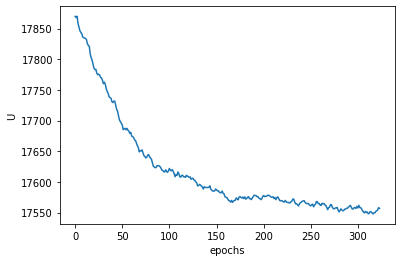

In [36]:
classifier.plot_U()

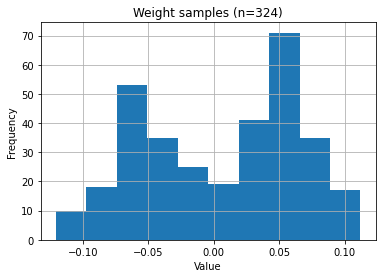

In [37]:
classifier.plot_sample_histogram()

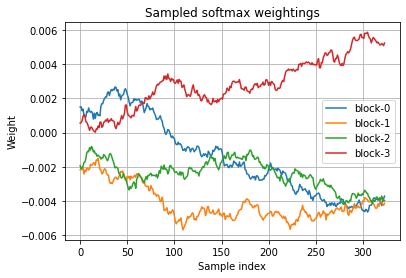

In [38]:
classifier.plot_sample_history()

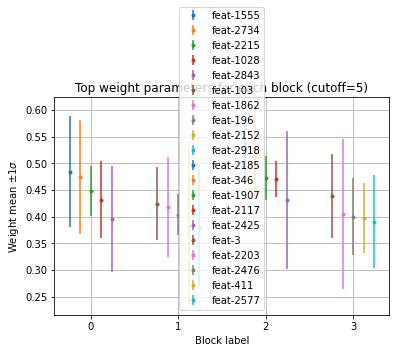

In [40]:
names = graph.get_feature_names()
classifier.plot_block_principal_dims(names, cutoff=5)

Discarding feature 0: feat-0
Discarding feature 274: feat-342
Discarding feature 411: feat-509
Discarding feature 472: feat-588
Discarding feature 1099: feat-1374
Discarding feature 1392: feat-1736
Discarding feature 1429: feat-1783
Discarding feature 1559: feat-1947
Discarding feature 1565: feat-1954
Discarding feature 1712: feat-2130
Discarding feature 1837: feat-2284
Discarding feature 1929: feat-2400
Discarding feature 2041: feat-2547
Discarding feature 2090: feat-2606
Discarding feature 2098: feat-2614
Discarding feature 2126: feat-2654
Discarding feature 2132: feat-2661
Discarding feature 2237: feat-2790
Discarding feature 2513: feat-3136
/home/lozza/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


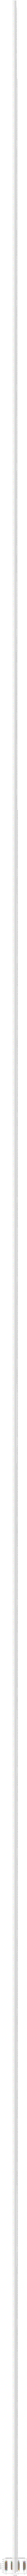

In [41]:
names = graph.get_feature_names()
classifier.plot_sampled_weights(names)